In [1]:
# a Importing Necessary packages
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random

In [2]:
# b Load the training and testing data (MNIST)
mnist = tf.keras.datasets.mnist

In [3]:
# splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# Normalising or scalling data
x_train = x_train / 255
x_test = x_test / 255


In [9]:
# c Define the network architecture using keras

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# d train the model using SGD

model.compile(optimizer = 'sgd',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7387 - loss: 1.0143 - val_accuracy: 0.9023 - val_loss: 0.3559
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.3474 - val_accuracy: 0.9192 - val_loss: 0.2915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9182 - loss: 0.2954 - val_accuracy: 0.9268 - val_loss: 0.2602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0.2608 - val_accuracy: 0.9345 - val_loss: 0.2355
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9352 - loss: 0.2331 - val_accuracy: 0.9388 - val_loss: 0.2172
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9395 - loss: 0.2179 - val_accuracy: 0.9426 - val_loss: 0.2020
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9430 - loss: 0.2023 - val_accuracy: 0.9448 - val_loss: 0.1914
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9471 - loss: 0.1888 - 

In [13]:
# e Evaluuate the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9457 - loss: 0.1895
loss=0.162
Accuracy=0.953


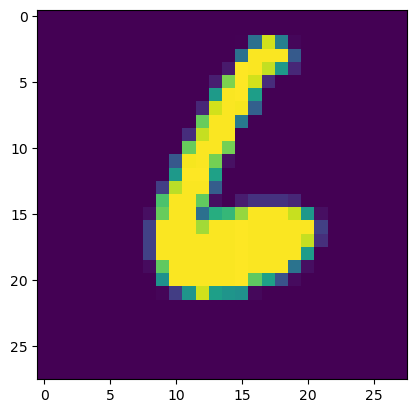

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


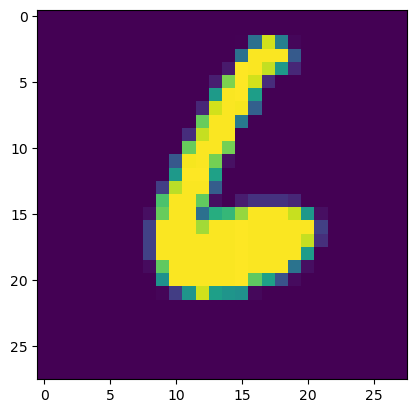

In [15]:
n=random.randint(0,9999)
plt.imshow(x_test[n],)
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [17]:
print('predicted value: ', predicted_value[n])

predicted value:  [5.6003914e-06 1.5918755e-07 2.7161571e-03 6.0045073e-07 2.7429933e-05
 1.6006953e-04 9.9708706e-01 4.1624579e-09 2.9047189e-06 7.4405975e-08]


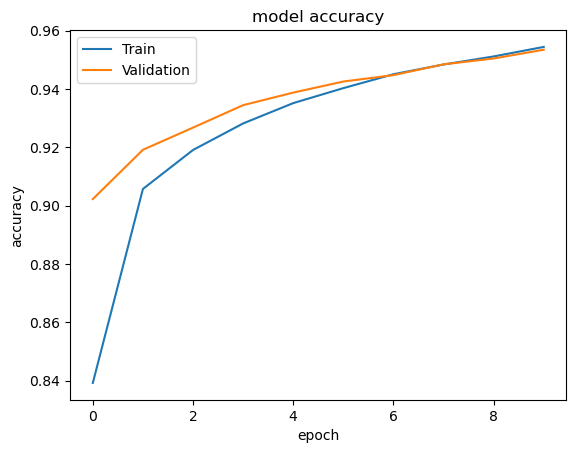

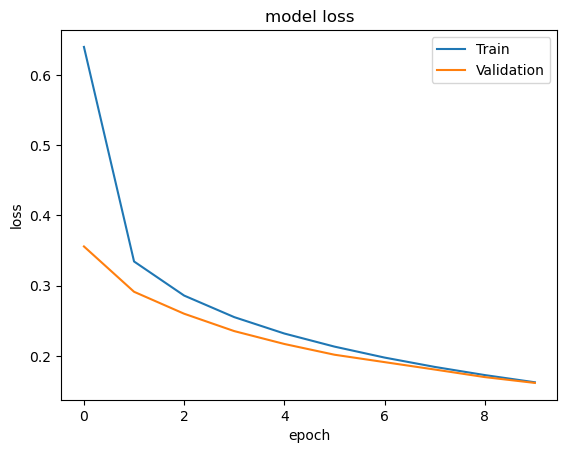

In [19]:
# f plot the training loss and accuracy

# plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plotting the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()